In [27]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_hastie_10_2           # make_hastie_10_2 generates a data set for binary classification 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True

RSEED = 42

In [28]:
df = pd.read_excel("data/drug_consumption.xls")

Create a Dataframe Subset for the machine learning algorithms

In [29]:
df_ml = df.copy()

In [30]:
# decrypt "Age" column:
df_ml['Age'] = df_ml['Age'].map({-0.95197:0,
                            -0.07854:1,
                             0.49788:2,
                             1.09449:3,
                             1.82213:4,
                             2.59171:5,
                             },)
# decrypt "Gender" column:
df_ml['Gender'] = df_ml['Gender'].map({0.48246:'Female',
                            -0.48246:'Male',
                             },)
# decrypt "Education" column:
df_ml['Education'] = df_ml['Education'].map({-2.43591:0,
                            -1.73790:0,
                            -1.43719:0,
                            -1.22751:0,
                            -0.61113:0,
                            -0.05921:1,
                             0.45468:1,
                             1.16365:1,
                             1.98437:1,
                             },)
# decrypt "Ethnicity" column:
df_ml['Ethnicity'] = df_ml['Ethnicity'].map({-0.50212:'Asian',
                            -1.10702:'Black',
                             1.90725:'Mixed-Black/Asian',
                             0.12600:'Mixed-White/Asian',
                            -0.22166:'Mixed-White/Black',
                             0.11440:'Other',
                            -0.31685:'White',
                             },)
# replace column values with country names
df_ml['Country'] = df_ml['Country'].map({-0.09765:'Australia',
                             0.24923:'Canada',
                            -0.46841:'New Zealand',
                            -0.28519: "Other",
                             0.21128:"Republic of Ireland",
                             0.96082:"UK",
                            -0.57009:"USA",
                             },)


df_ml.tail(15)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA
1870,1874,1,Female,1,Other,White,-1.05308,0.96248,1.88511,1.81866,...,CL3,CL0,CL0,CL0,CL3,CL0,CL1,CL5,CL0,CL0
1871,1875,0,Male,0,USA,White,1.02119,-0.43999,1.43533,-1.07533,...,CL3,CL6,CL3,CL5,CL3,CL3,CL0,CL6,CL0,CL6
1872,1876,0,Male,0,Canada,White,-0.79151,0.00332,2.44904,0.76096,...,CL2,CL0,CL2,CL2,CL0,CL0,CL0,CL0,CL0,CL0
1873,1877,0,Male,0,USA,White,0.73545,-1.23177,0.58331,-0.60633,...,CL3,CL2,CL0,CL5,CL2,CL2,CL3,CL6,CL0,CL2
1874,1878,5,Male,0,USA,White,2.12700,-0.15487,2.44904,0.94156,...,CL0,CL0,CL0,CL0,CL1,CL0,CL1,CL0,CL0,CL0
1875,1879,0,Male,0,USA,Mixed-White/Asian,-0.05188,-1.76250,0.58331,-0.76096,...,CL5,CL0,CL0,CL2,CL4,CL0,CL4,CL6,CL0,CL2
1876,1880,1,Male,0,Canada,Other,-0.14882,-0.57545,1.43533,-0.91699,...,CL3,CL0,CL3,CL5,CL3,CL0,CL4,CL2,CL0,CL2
1877,1881,0,Male,0,USA,White,1.49158,-1.92173,-0.58331,-1.77200,...,CL2,CL5,CL0,CL2,CL0,CL6,CL0,CL6,CL0,CL2
1878,1882,0,Male,1,Canada,White,-0.05188,-1.76250,0.88309,-0.76096,...,CL0,CL0,CL0,CL2,CL0,CL0,CL2,CL2,CL0,CL0
1879,1883,0,Male,0,Other,White,-0.79151,0.32197,0.29338,-0.30172,...,CL5,CL2,CL0,CL4,CL5,CL4,CL0,CL6,CL0,CL1


In [31]:
# Creating list for categorical predictors/features 
# (dates are also objects so if you have them in your data you would deal with them first)
cat_features = list(df_ml.columns[df_ml.dtypes==object])

In [32]:
cat_drugs = cat_features[3:]
print(cat_drugs)
for category in cat_drugs:
    df_ml[category] = df_ml[category].map({'CL0':0,
                            'CL1':0,
                            'CL2':0,
                            'CL3':1,
                            'CL4':1,
                            'CL5':1,
                            'CL6':1,
                             },)

['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Shrooms', 'Nicotine', 'Semer', 'VSA']


In [33]:
# introducing a new column "Legal_Usage" to the dataset df_ml:
#legal_drugs = ['Alcohol', 'Caff', 'Choc', 'Legalh', 'Nicotine']

df_ml.eval("Legal_Usage = Alcohol + Caff + Choc + Legalh + Nicotine", inplace = True)
df_ml['Legal_Usage'] = df_ml['Legal_Usage'].apply(lambda x: 1 if x >= 1 else 0);

# introducing a new column "Low_Risk_Usage" to the dataset df_ml:
#Low_Risk_drugs = ['Benzos', 'Cannabis', 'Shrooms', 'Amyl']

df_ml.eval("Low_Risk_Usage = Benzos + Cannabis + Shrooms + Amyl", inplace = True)
df_ml['Low_Risk_Usage'] = df_ml['Low_Risk_Usage'].apply(lambda x: 1 if x >= 1 else 0);

# introducing a new column "High_Risk_Usage" to the dataset df_ml:
#High_Risk_drugs = ['Amphet', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'LSD', 'Meth']

df_ml.eval("High_Risk_Usage = Amphet + Coke + Crack + Ecstasy + Heroin + Ketamine + LSD + Meth", inplace = True)
df_ml['High_Risk_Usage'] = df_ml['High_Risk_Usage'].apply(lambda x: 1 if x >= 1 else 0);




In [34]:
df_ml.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Legalh,LSD,Meth,Shrooms,Nicotine,Semer,VSA,Legal_Usage,Low_Risk_Usage,High_Risk_Usage
0,1,2,Female,1,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,0,0,0,0,0,0,0,1,0,0
1,2,1,Male,1,UK,White,-0.67825,1.93886,1.43533,0.76096,...,0,0,1,0,1,0,0,1,1,1
2,3,2,Male,1,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,0,0,0,0,0,0,0,1,1,0
3,4,0,Female,1,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,0,0,0,0,0,0,0,1,1,0
4,5,2,Female,1,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,0,0,0,0,0,0,0,1,1,0


In [35]:
df_ml["Ethnicity"] = df_ml['Ethnicity'].map({'White':0,
                           'Other':1,
                           'Black':2,
                           'Asian':3,
                           'Mixed-White/Black':4,
                           'Mixed-White/Asian':5,
                           'Mixed-Black/Asian':6,
                             },)

In [36]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               1885 non-null   int64  
 1   Age              1885 non-null   int64  
 2   Gender           1885 non-null   object 
 3   Education        1885 non-null   int64  
 4   Country          1885 non-null   object 
 5   Ethnicity        1885 non-null   int64  
 6   Nscore           1885 non-null   float64
 7   Escore           1885 non-null   float64
 8   Oscore           1885 non-null   float64
 9   Ascore           1885 non-null   float64
 10  Cscore           1885 non-null   float64
 11  Impulsive        1885 non-null   float64
 12  SS               1885 non-null   float64
 13  Alcohol          1885 non-null   int64  
 14  Amphet           1885 non-null   int64  
 15  Amyl             1885 non-null   int64  
 16  Benzos           1885 non-null   int64  
 17  Caff          

Drop those parameters which are not relevant for the Hypotheses testing or which are already integrated into a different Parameter (ALL Drug columns, for they are represented by the columns "Legal_usage", "Low_Risk_Usage" and "High_Risk_Usage", as well as columns "Gender", "Country" and "Ethnicity") 

In [37]:
"""
df_ml = df_ml[["Age", "Education", "Nscore", "Escore", 
               "Oscore", "Ascore", "Cscore", "Impulsive",
               "SS", "Legal_Usage", "Low_Risk_Usage", "High_Risk_Usage"]]

"""
df_ml = df_ml[["Age", "Education", "Ethnicity", "Nscore", "Escore", 
               "Oscore", "Ascore", "Cscore", "Impulsive",
               "SS", "Legal_Usage", "Low_Risk_Usage", "High_Risk_Usage"]]


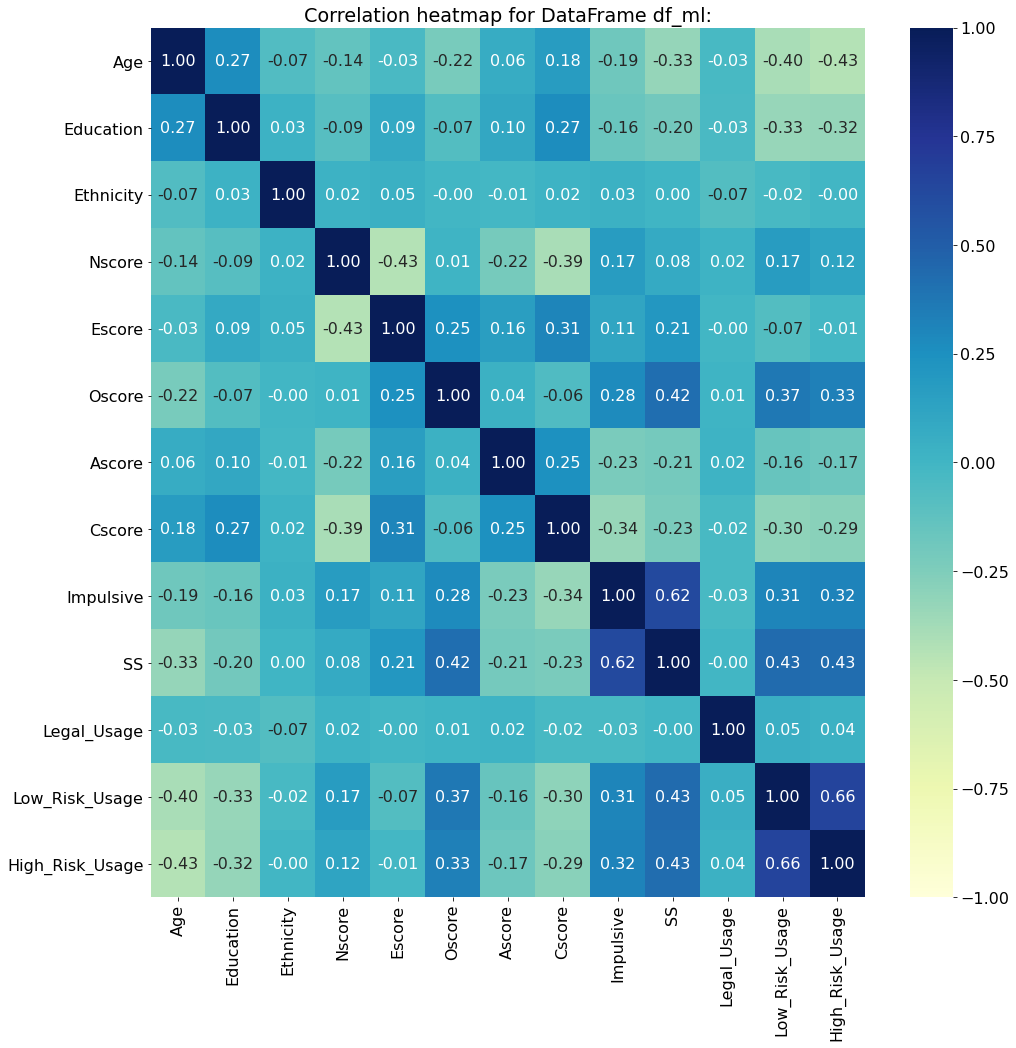

In [38]:
# Correlation heatmap for reduced DataFrame df_ml:
plt.figure(figsize=(16,16));
plt.rcParams.update({'font.size':16})
plt.title('Correlation heatmap for DataFrame df_ml:')
correlations = df_ml.iloc[:, :].corr()
mask = np.triu(correlations)
sns.heatmap(correlations ,fmt='.2f', vmax=1, vmin=-1, annot=True, mask=None, cmap="YlGnBu");
plt.savefig('pictures/Correlation_Heatmap2.png', transparent=True)

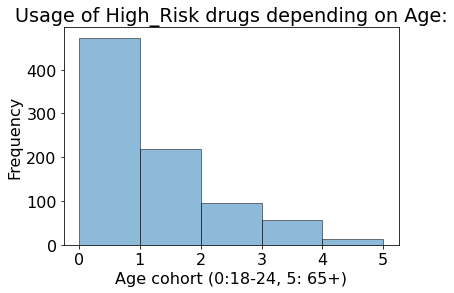

In [39]:
plt.xlabel('Age cohort (0:18-24, 5: 65+)')
plt.ylabel('Frequency')
plt.title('Usage of High_Risk drugs depending on Age:')
#plt.xlim([10000, 30000])
#fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=10, alpha=0.9)
fig = df_ml.query("High_Risk_Usage == 1")["Age"].plot.hist(bins=5, alpha=0.5)
plt.savefig('pictures/High_Risk_Drug_usage_depending_on_age.png', transparent=True)

In [40]:
# Before we go on let's split the data into features and target label
features = df_ml.drop('High_Risk_Usage', axis = 1)
target = df_ml['High_Risk_Usage']

In [41]:
# Import functions from own Python-File (see visuals_script.py in Repo)
import visuals_script as vs

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.17, random_state = 0)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 1564 samples.
Testing set has 321 samples.


In [42]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler


# Initialize a scaler, then apply it to the features

scaler = MinMaxScaler(feature_range= (-1,1))
numerical = ["Age", "Education", "Ethnicity", "Nscore", "Escore", 
               "Oscore", "Ascore", "Cscore", "Impulsive",
               "SS", "Legal_Usage", "Low_Risk_Usage"]
X_train[numerical] = scaler.fit_transform(X_train[numerical])
X_test[numerical] = scaler.transform(X_test[numerical])

# Show an example of a record with scaling applied
X_train[numerical].sample(1)

<ipython-input-42-16e91300d3e4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[numerical] = scaler.fit_transform(X_train[numerical])
/Users/borisgeller/neuefische/Drug-Consumption/.venv/lib/python3.8/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
<ipython-input-42-16e91300d3e4>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

,Age,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Legal_Usage,Low_Risk_Usage
1542,-1.0,-1.0,-1.0,0.331362,-0.289496,0.346286,0.08604,-0.041211,-0.32416,0.239915,1.0,1.0


In [43]:
from time import time

# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score
from sklearn.metrics import fbeta_score, accuracy_score

# Define a train and evaluation function 
def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size'
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set,
    #       then get predictions on the first 300 training samples
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:300])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples
    results['acc_train'] = accuracy_score(y_train[:300], predictions_train)
        
    # TODO: Compute accuracy on test set
    results['acc_test'] = accuracy_score(y_test,predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples
    results['f_train'] = fbeta_score(y_train[:300], predictions_train, beta=0.5)
        
    # TODO: Compute F-score on the test set
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print ("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

In [44]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

# TODO: Initialize the three models, the random states are set to 101 so we know how to reproduce the model later
clf_A = DecisionTreeClassifier(random_state=101)
clf_B = SVC(random_state=101)
clf_C = AdaBoostClassifier(random_state=101)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
samples_1 = int(round(len(X_train) / 100))
samples_10 = int(round(len(X_train) / 10))
samples_100 = len(X_train)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

DecisionTreeClassifier trained on 16 samples.
DecisionTreeClassifier trained on 156 samples.
DecisionTreeClassifier trained on 1564 samples.
SVC trained on 16 samples.
SVC trained on 156 samples.
SVC trained on 1564 samples.
AdaBoostClassifier trained on 16 samples.
AdaBoostClassifier trained on 156 samples.
AdaBoostClassifier trained on 1564 samples.


In [45]:
#Printing out the values
for i in results.items():
    print (i[0])
    display(pd.DataFrame(i[1]).rename(columns={0:'1%', 1:'10%', 2:'100%'}))

DecisionTreeClassifier


,1%,10%,100%
train_time,0.003596,0.002661,0.007147
pred_time,0.004577,0.002765,0.003360
acc_train,0.803333,0.870000,1.000000
acc_test,0.753894,0.728972,0.766355
f_train,0.760341,0.860058,1.000000
f_test,0.702532,0.685131,0.724234


SVC


,1%,10%,100%
train_time,0.002466,0.002580,0.055879
pred_time,0.003506,0.007232,0.045525
acc_train,0.803333,0.850000,0.840000
acc_test,0.791277,0.806854,0.822430
f_train,0.748337,0.801205,0.791367
f_test,0.726164,0.751834,0.766423


AdaBoostClassifier


,1%,10%,100%
train_time,0.066364,0.065512,0.092808
pred_time,0.019888,0.018917,0.019258
acc_train,0.803333,0.903333,0.843333
acc_test,0.753894,0.753894,0.797508
f_train,0.760341,0.890313,0.815364
f_test,0.702532,0.714286,0.756131


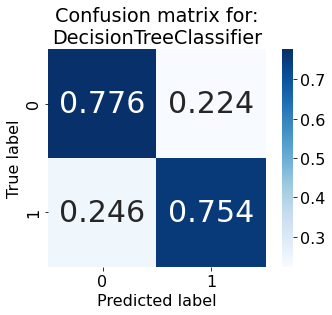

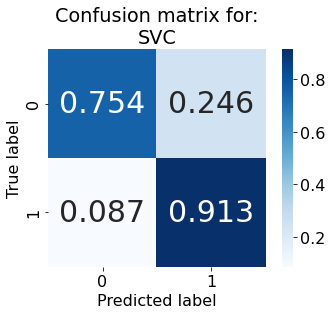

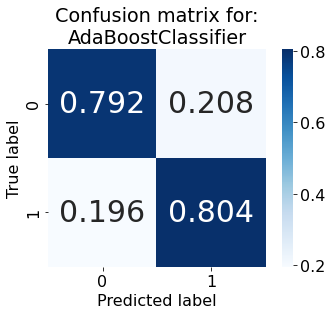

In [46]:
#Visualizing the confusion matrix for each classifier
from sklearn.metrics import confusion_matrix

for i,model in enumerate([clf_A,clf_B,clf_C]):
    cm = confusion_matrix(y_test, model.predict(X_test))
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize the data

    # view with a heatmap
    plt.figure(i)
    sns.heatmap(cm, annot=True, annot_kws={"size":30}, 
            cmap='Blues', square=True, fmt='.3f')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

In [47]:
# Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer 

# Initialize the classifier
clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), random_state=42) 

# Create the parameters list you wish to tune
parameters = {'n_estimators':[50, 120],                
              'learning_rate':[ 0.01, 0.1, 0.5, 1.],               
              'base_estimator__min_samples_split' : np.arange(2, 8, 2),               
              'base_estimator__max_depth' : np.arange(1, 4, 1)              
             } 

# Make an fbeta_score scoring object
scorer = make_scorer(fbeta_score,beta=0.5) 

# Perform grid search on the classifier using 'scorer' as the scoring method
grid_obj = GridSearchCV(clf, parameters, scorer, verbose=1, n_jobs=-1)

# Fit the grid search object to the training data and find the optimal parameters
grid_fit = grid_obj.fit(X_train,y_train) 

# Get the estimator
best_clf = grid_fit.best_estimator_ 

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test) 

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print(best_clf)

/Users/borisgeller/neuefische/Drug-Consumption/.venv/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass scoring=make_scorer(fbeta_score, beta=0.5) as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Unoptimized model
------
Accuracy score on testing data: 0.7477
F-score on testing data: 0.7070

Optimized Model
------
Final accuracy score on the testing data: 0.8287
Final F-score on the testing data: 0.7769
AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3),
                   learning_rate=0.01, random_state=42)


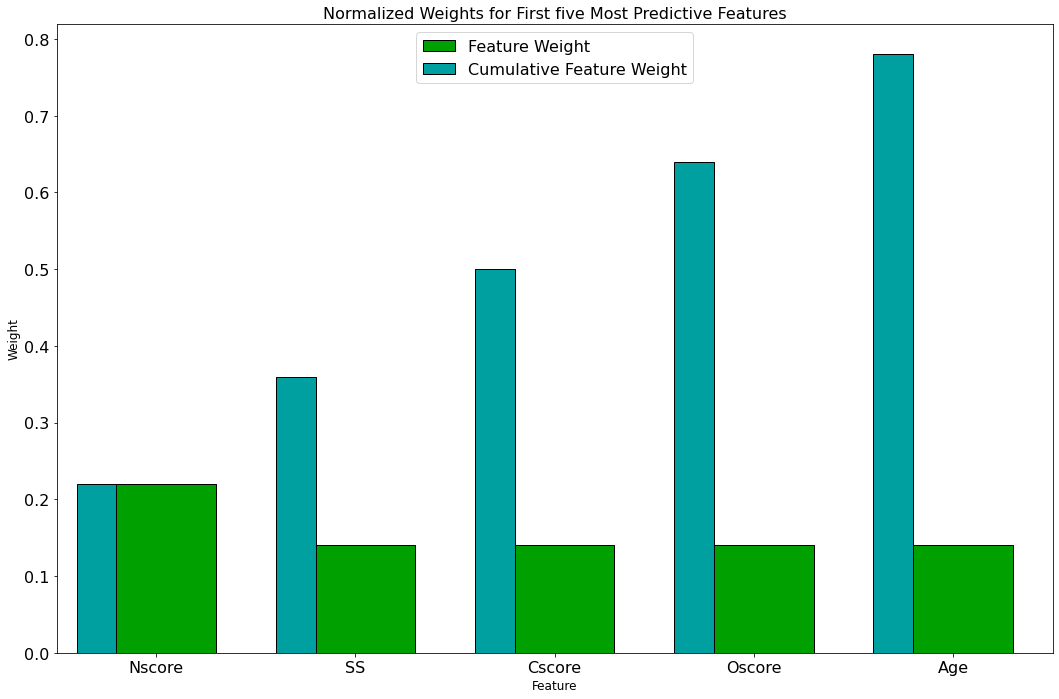

<Figure size 432x288 with 0 Axes>

In [48]:
# TODO: Import a supervised learning model that has 'feature_importances_'

# TODO: Train the supervised model on the training set 
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)
plt.savefig('pictures/Five_most_predictive_features.png', transparent=True)

In [49]:
df_ml["Ethnicity"] = df_ml['Ethnicity'].map({0:'White',
                           1:'Other',
                           2:'Black',
                           3:'Asian',
                           4:'Mixed-White/Black',
                           5:'Mixed-White/Asian',
                           6:'Mixed-Black/Asian',
                             },)

In [50]:
df_ml["Ethnicity"].unique()

array(['Mixed-White/Asian', 'White', 'Other', 'Mixed-White/Black',
       'Asian', 'Black', 'Mixed-Black/Asian'], dtype=object)

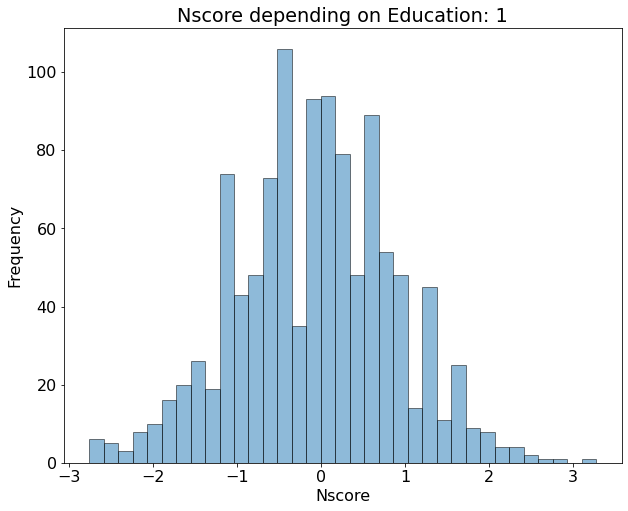

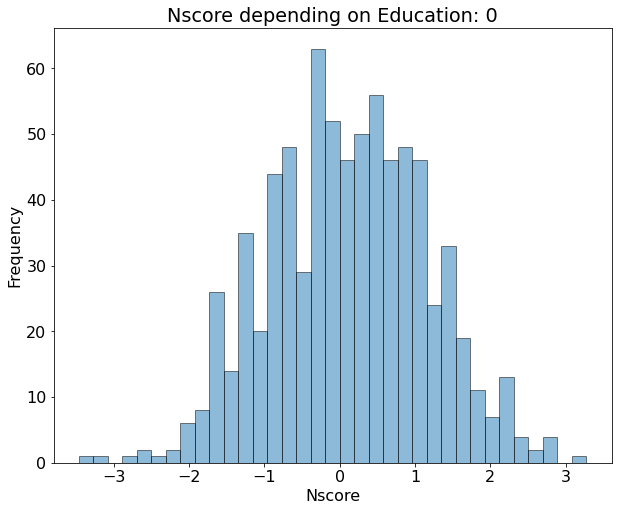

In [51]:
x = df_ml["Education"].value_counts()
education_list = x.index.to_list()
for education in education_list:
    plt.figure(figsize=(10,8));
    plt.rcParams.update({'font.size':16})
    plt.xlabel('Nscore')
    plt.ylabel('Count')
    plt.title(f'Nscore depending on Education: {education}')
    #plt.xlim([10000, 30000])
    #fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)

    fig = df_ml.query(f"Education == {education}")["Nscore"].plot.hist(bins=35, alpha=0.5)

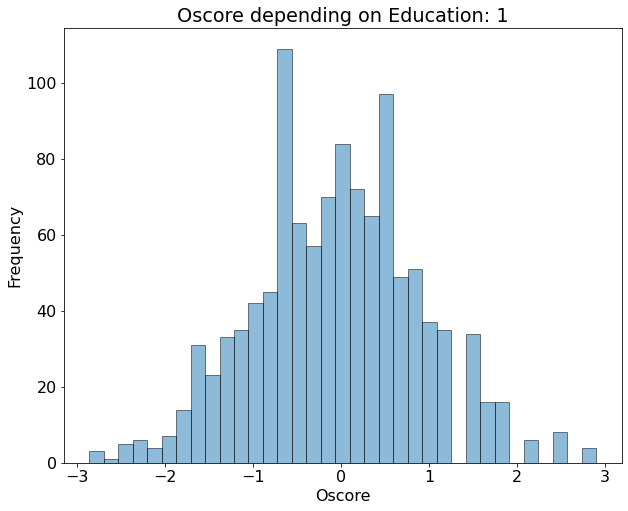

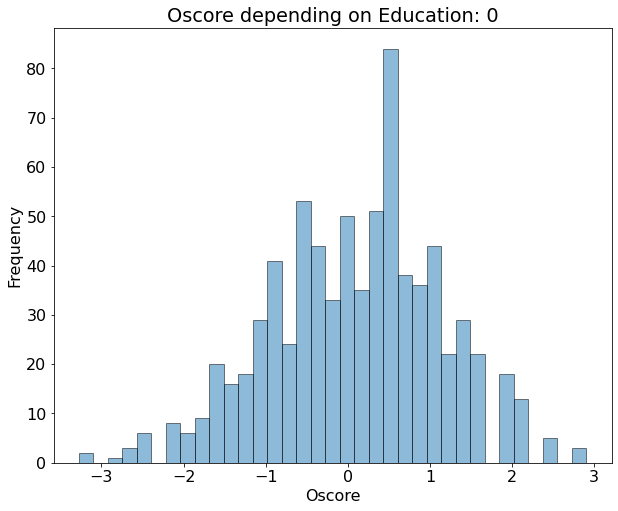

In [52]:
x = df_ml["Education"].value_counts()
education_list = x.index.to_list()

for education in education_list:
    plt.figure(figsize=(10,8));
    plt.rcParams.update({'font.size':16})
    plt.xlabel('Oscore')
    plt.ylabel('Count')
    plt.title(f'Oscore depending on Education: {education}')
    #plt.xlim([10000, 30000])
    #fig = df_ml.query("High_Risk_Usage == 0")["Age"].plot.hist(bins=43, alpha=0.9)

    fig = df_ml.query(f"Education == {education}")["Oscore"].plot.hist(bins=35, alpha=0.5)

In [28]:
for education in education_list:
    print(df_ml.query(f"Education == {education}")["Oscore"].mean())

-0.059909607843137244
0.08677750982961994
